# **Importing Libraries**






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# **Loading Data**






In [2]:
data1 = pd.read_csv('economy.csv')
data2 = pd.read_csv('business.csv')

# Add a 'class' column to each DataFrame
data1['class'] = 'Economy'
data2['class'] = 'Business'

# Concatenate the DataFrames
data = pd.concat([data1, data2])

# **Discovering Data**






In [ ]:
data.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,days_left,class
0,11-02-2022,SpiceJet,SG,8709.0,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",1.0,Economy
1,11-02-2022,SpiceJet,SG,8157.0,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",1.0,Economy
2,11-02-2022,AirAsia,I5,764.0,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",1.0,Economy
3,11-02-2022,Vistara,UK,995.0,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",1.0,Economy
4,11-02-2022,Vistara,UK,963.0,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",1.0,Economy


In [ ]:
data.tail()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,days_left,class
93482,31-03-2022,Vistara,UK,822.0,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",49.0,Business
93483,31-03-2022,Vistara,UK,826.0,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",49.0,Business
93484,31-03-2022,Vistara,UK,832.0,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",49.0,Business
93485,31-03-2022,Vistara,UK,828.0,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",49.0,Business
93486,31-03-2022,Vistara,UK,822.0,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"81,585",49.0,Business


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300164 entries, 0 to 93486
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        300159 non-null  object 
 1   airline     300159 non-null  object 
 2   ch_code     300159 non-null  object 
 3   num_code    300159 non-null  float64
 4   dep_time    300159 non-null  object 
 5   from        300159 non-null  object 
 6   time_taken  300159 non-null  object 
 7   stop        300159 non-null  object 
 8   arr_time    300159 non-null  object 
 9   to          300159 non-null  object 
 10  price       300159 non-null  object 
 11  days_left   300159 non-null  float64
 12  class       300164 non-null  object 
dtypes: float64(2), object(11)
memory usage: 32.1+ MB


In [ ]:
data.describe()

,num_code,days_left
count,300159.000000,300159.00000
mean,1418.144680,26.01268
std,1974.742181,13.56451
min,101.000000,1.00000
25%,637.000000,15.00000
50%,818.000000,26.00000
75%,927.000000,38.00000
max,9991.000000,49.00000


In [ ]:
data.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price', 'days_left', 'class'],
      dtype='object')

In [ ]:
data.dtypes

,0
date,object
airline,object
ch_code,object
num_code,float64
dep_time,object
from,object
time_taken,object
stop,object
arr_time,object
to,object


In [ ]:
data.shape

(300164, 13)

In [ ]:
print("Number of missing values: ",data.isnull().sum())

Number of missing values:  date          5
airline       5
ch_code       5
num_code      5
dep_time      5
from          5
time_taken    5
stop          5
arr_time      5
to            5
price         5
days_left     5
class         0
dtype: int64


In [ ]:
print("Number of duplicated values: ",data.isnull().sum())

Number of duplicated values:  date          5
airline       5
ch_code       5
num_code      5
dep_time      5
from          5
time_taken    5
stop          5
arr_time      5
to            5
price         5
days_left     5
class         0
dtype: int64


# **Cleaning Data**

In [3]:
df=data.copy()

Cleaning Departure and Arrival Times

In [4]:
def flight_time(x):
    # Categorizes time into parts of the day.
    if (x > 4) and (x <= 8):
        return "Early Morning"
    elif (x > 8) and (x <= 12):
        return "Morning"
    elif (x > 12) and (x <= 16):
        return "Afternoon"
    elif (x > 16) and (x <= 20):
        return "Evening"
    elif (x > 20) and (x <= 24):
        return "Night"
    else:
        return "Late Night"

# Extract the hour from the arrival and departure times
df['arrival_hour'] = pd.to_numeric(df['arr_time'].str[:2], errors='coerce').fillna(0).astype(int)
df['departure_hour'] = pd.to_numeric(df['dep_time'].str[:2], errors='coerce').fillna(0).astype(int)

# Apply the function to categorize the times
df['arrival_time'] = df['arrival_hour'].apply(flight_time)
df['departure_time'] = df['departure_hour'].apply(flight_time)

Cleaning Number of Stops

In [5]:
def categorize_stops(x):
    if x == 0:
        return 'zero'
    elif x == 1:
        return 'one'
    else:
        return 'two_or_more'

df['stop'] = df['stop'].astype(str)
df['stop'] = df['stop'].str.replace('non-stop', '0') \
                        .str.replace(' ', '') \
                        .str.replace('stops', '') \
                        .str.replace('\n', '') \
                        .str.replace('\t', '') \
                        .str.replace('-stop', '') \
                        .str.replace('Via', '')

df['stop'] = pd.to_numeric(df['stop'], errors='coerce').fillna(0).astype(int)
df['stops'] = df['stop'].apply(categorize_stops)

Cleaning Duration

In [6]:
def convert_duration(duration):
    # Converts object to int for the duration column.
    if pd.isnull(duration) or isinstance(duration, (int, float)):
        return float('nan')

    if 'h' not in duration and 'm' not in duration:
        return float('nan')

    if 'h' in duration and 'm' in duration:
        hours, minutes = duration.split('h ')
        hours = int(float(hours))
        minutes = int(minutes[:-1]) if minutes[:-1] else 0 # Remove the 'm' and convert to int
    elif 'h' in duration:
        hours = int(duration[:-1])  # Remove the 'h' and convert to int
        minutes = 0
    else:  # 'm' in duration
        hours = 0
        minutes = int(duration[:-1])  # Remove the 'm' and convert to int

    total_hours = hours + minutes / 60
    return total_hours

df['duration'] = df['time_taken'].apply(convert_duration).round(2)

Cleaning Price

In [7]:
# Changing data type from object to float
df['price'] = df['price'].str.replace(',', '', regex=True).astype(float)

Dropping Missing Values and Duplicates

In [8]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,days_left,class,arrival_hour,departure_hour,arrival_time,departure_time,stops,duration
0,11-02-2022,SpiceJet,SG,8709.0,18:55,Delhi,02h 10m,0,21:05,Mumbai,5953.0,1.0,Economy,21,18,Night,Evening,zero,2.17
1,11-02-2022,SpiceJet,SG,8157.0,06:20,Delhi,02h 20m,0,08:40,Mumbai,5953.0,1.0,Economy,8,6,Early Morning,Early Morning,zero,2.33
2,11-02-2022,AirAsia,I5,764.0,04:25,Delhi,02h 10m,0,06:35,Mumbai,5956.0,1.0,Economy,6,4,Early Morning,Late Night,zero,2.17
3,11-02-2022,Vistara,UK,995.0,10:20,Delhi,02h 15m,0,12:35,Mumbai,5955.0,1.0,Economy,12,10,Morning,Morning,zero,2.25
4,11-02-2022,Vistara,UK,963.0,08:50,Delhi,02h 20m,0,11:10,Mumbai,5955.0,1.0,Economy,11,8,Morning,Early Morning,zero,2.33


Dropping Unnecessary Columns

In [9]:
df=df.drop(columns=['date','ch_code','num_code','dep_time','arr_time','stop','time_taken','arrival_hour','departure_hour'])
df.head()

,airline,from,to,price,days_left,class,arrival_time,departure_time,stops,duration
0,SpiceJet,Delhi,Mumbai,5953.0,1.0,Economy,Night,Evening,zero,2.17
1,SpiceJet,Delhi,Mumbai,5953.0,1.0,Economy,Early Morning,Early Morning,zero,2.33
2,AirAsia,Delhi,Mumbai,5956.0,1.0,Economy,Early Morning,Late Night,zero,2.17
3,Vistara,Delhi,Mumbai,5955.0,1.0,Economy,Morning,Morning,zero,2.25
4,Vistara,Delhi,Mumbai,5955.0,1.0,Economy,Morning,Early Morning,zero,2.33


In [10]:
df = df.rename(columns={'from': 'source_city', 'to': 'destination_city'})
df = df[['airline','class', 'source_city', 'destination_city', 'departure_time', 'duration', 'stops', 'arrival_time', 'days_left','price']]
df.head()

,airline,class,source_city,destination_city,departure_time,duration,stops,arrival_time,days_left,price
0,SpiceJet,Economy,Delhi,Mumbai,Evening,2.17,zero,Night,1.0,5953.0
1,SpiceJet,Economy,Delhi,Mumbai,Early Morning,2.33,zero,Early Morning,1.0,5953.0
2,AirAsia,Economy,Delhi,Mumbai,Late Night,2.17,zero,Early Morning,1.0,5956.0
3,Vistara,Economy,Delhi,Mumbai,Morning,2.25,zero,Morning,1.0,5955.0
4,Vistara,Economy,Delhi,Mumbai,Early Morning,2.33,zero,Morning,1.0,5955.0


## **Exploratory Data Analysis**



# 1.   **Univariate Analysis**





Distribution Of Airline Companies

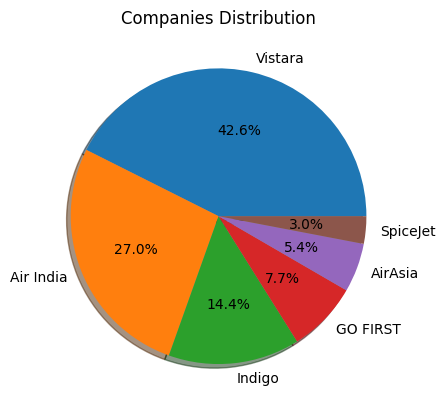

In [ ]:
com_counts=df['airline'].value_counts()
com_counts_table=pd.DataFrame(com_counts)
fig,ax=plt.subplots()
ax.pie(com_counts_table.values.squeeze(),labels=com_counts_table.index,autopct='%1.1f%%',shadow=True)
plt.title('Companies Distribution')
plt.show()

Flight Number Between Cities

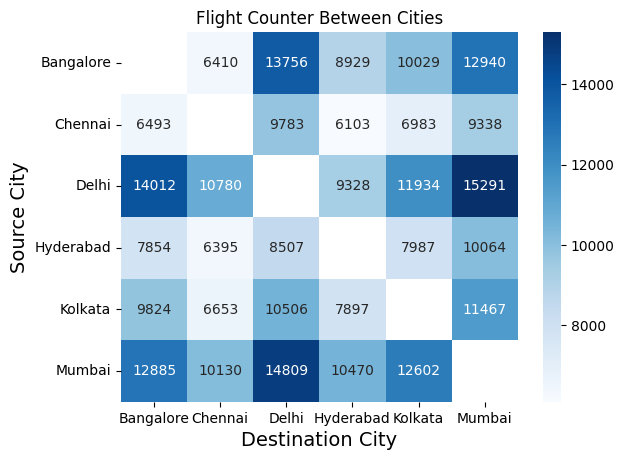

In [ ]:
flight_cities_num=df.pivot_table(index='source_city',columns='destination_city',aggfunc='count',values='price')
sns.heatmap(flight_cities_num,annot=True,cmap='Blues',fmt='.0f')
plt.title('Flight Counter Between Cities')
plt.xlabel('Destination City',fontsize=14)
plt.ylabel('Source City',fontsize=14)
plt.show()

Average Prices for each Company

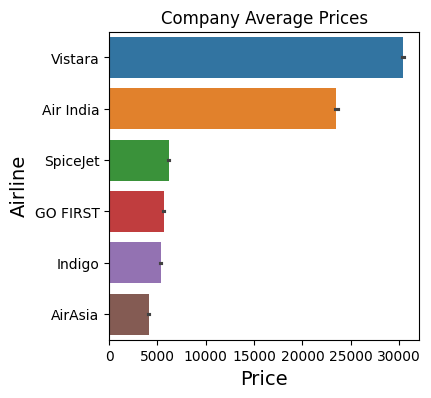

In [ ]:
plt.figure(figsize=(4,4))
sns.barplot(x='price',y='airline',data=df.sort_values('price',ascending=False),hue='airline')
plt.title('Company Average Prices')
plt.xlabel('Price',fontsize=14)
plt.ylabel('Airline',fontsize=14)
plt.show()

Price Distribution of Classes

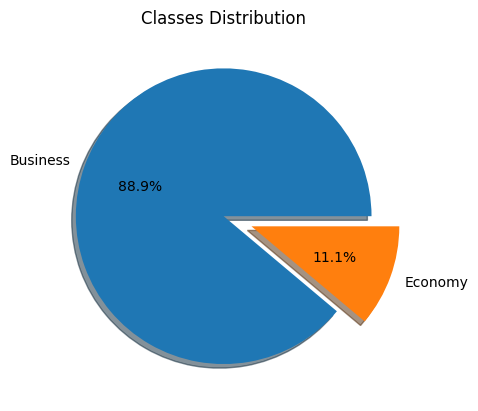

In [ ]:
Dist_Class_price=df.groupby('class').price.agg('mean')
class_price=pd.DataFrame(Dist_Class_price)
fig,ax=plt.subplots()
ax.pie(class_price.values.squeeze(),labels=class_price.index,autopct='%1.1f%%',shadow=True,explode=(0,0.2))
plt.title('Classes Distribution')
plt.show()

Number of Stops per Airline

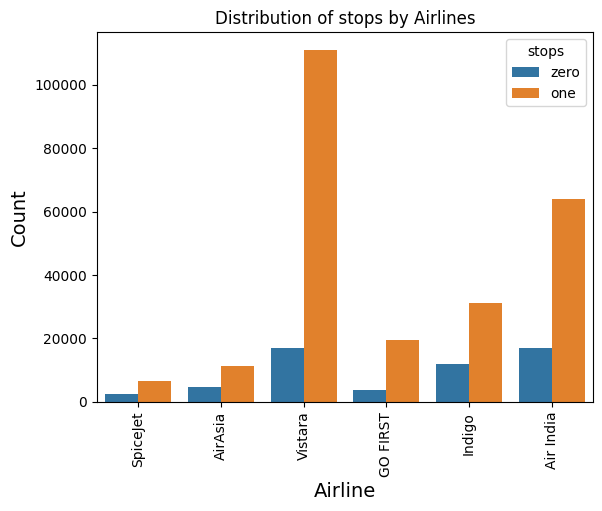

In [ ]:
sns.countplot(x='airline',data=df,hue='stops')
plt.title('Distribution of stops by Airlines')
plt.xlabel('Airline',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=14)
plt.show()

Most flights Destination by Airlines

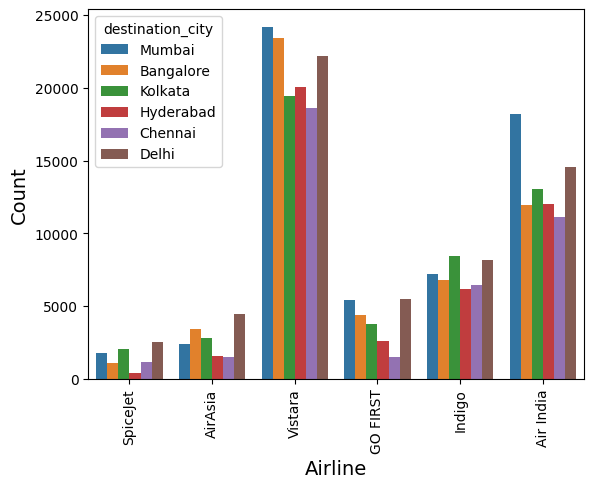

In [ ]:
sns.countplot(x='airline',hue='destination_city',data=df)
plt.xlabel('Airline',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=14)
plt.show()

Total Average Prices of Departure Time

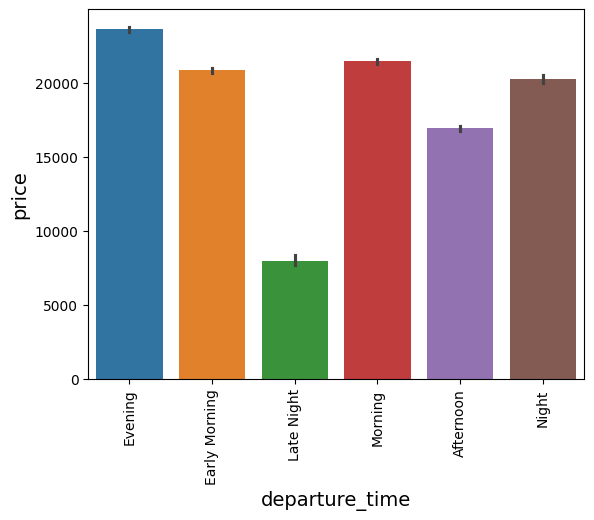

In [ ]:
sns.barplot(x='departure_time',y='price',data=df,hue='departure_time')
plt.xlabel('departure_time',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('price',fontsize=14)
plt.show()

Days Left Affection on Prices

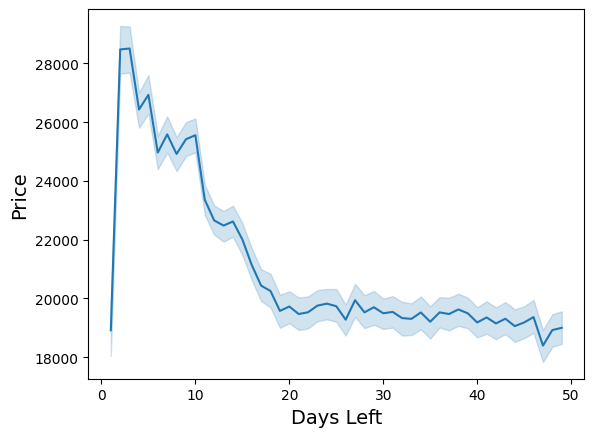

In [ ]:
sns.lineplot(x='days_left',y='price',data=df)
plt.xlabel('Days Left',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()

#**2. Bivariate Analysis**

Average Duration Between Cities

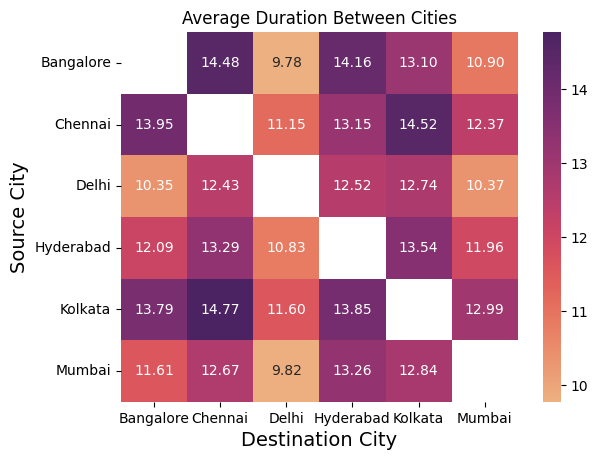

In [ ]:
average_duration_cities=df.pivot_table(index='source_city',columns='destination_city',aggfunc='mean',values='duration')
sns.heatmap(average_duration_cities,annot=True,cmap='flare',fmt='.2f')
plt.title('Average Duration Between Cities')
plt.xlabel('Destination City',fontsize=14)
plt.ylabel('Source City',fontsize=14)
plt.show()

Prices of Airline per Class

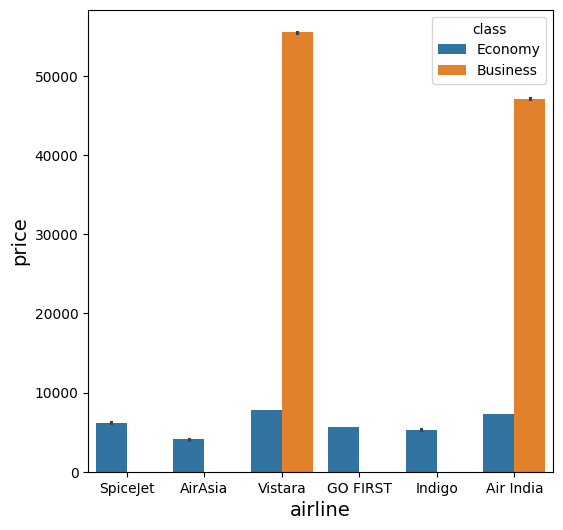

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='airline',y='price',data=df,hue='class')
plt.xlabel('airline',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.show()

Average Prices of Departure Time by Airlines

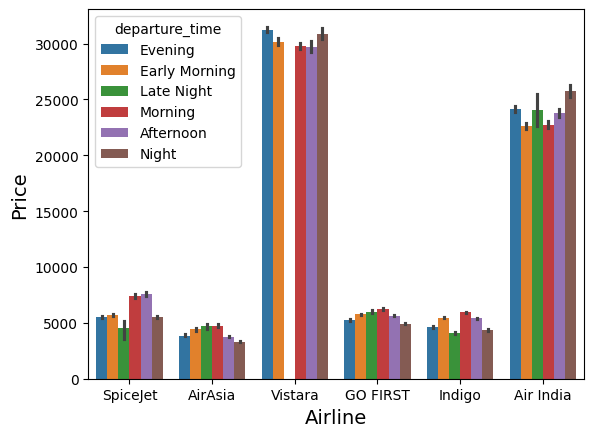

In [ ]:
sns.barplot(x='airline',y='price',data=df,hue='departure_time')
plt.xlabel('Airline',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()

Average Destination City Prices by Airline

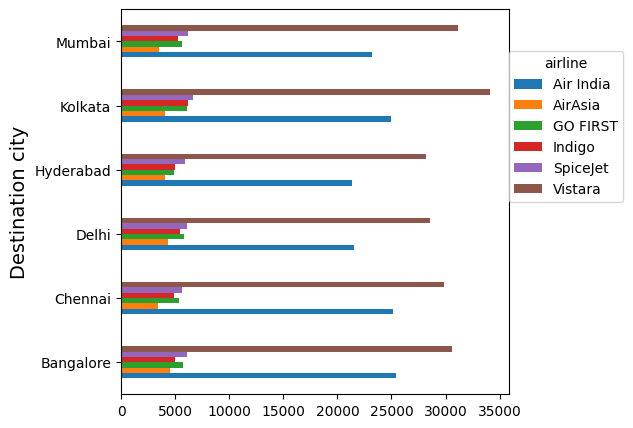

In [ ]:
AVG_des_air_price=df.pivot_table(index='destination_city',columns='airline',aggfunc='mean',values='price')
plot=AVG_des_air_price.plot(kind='barh',figsize=(5,5))
sns.move_legend(plot,(1,0.5))
plt.ylabel('Destination city',fontsize=14)
plt.show()

#**3. Multivariate Analysis**

Average Prices vs Departure Time by Airline

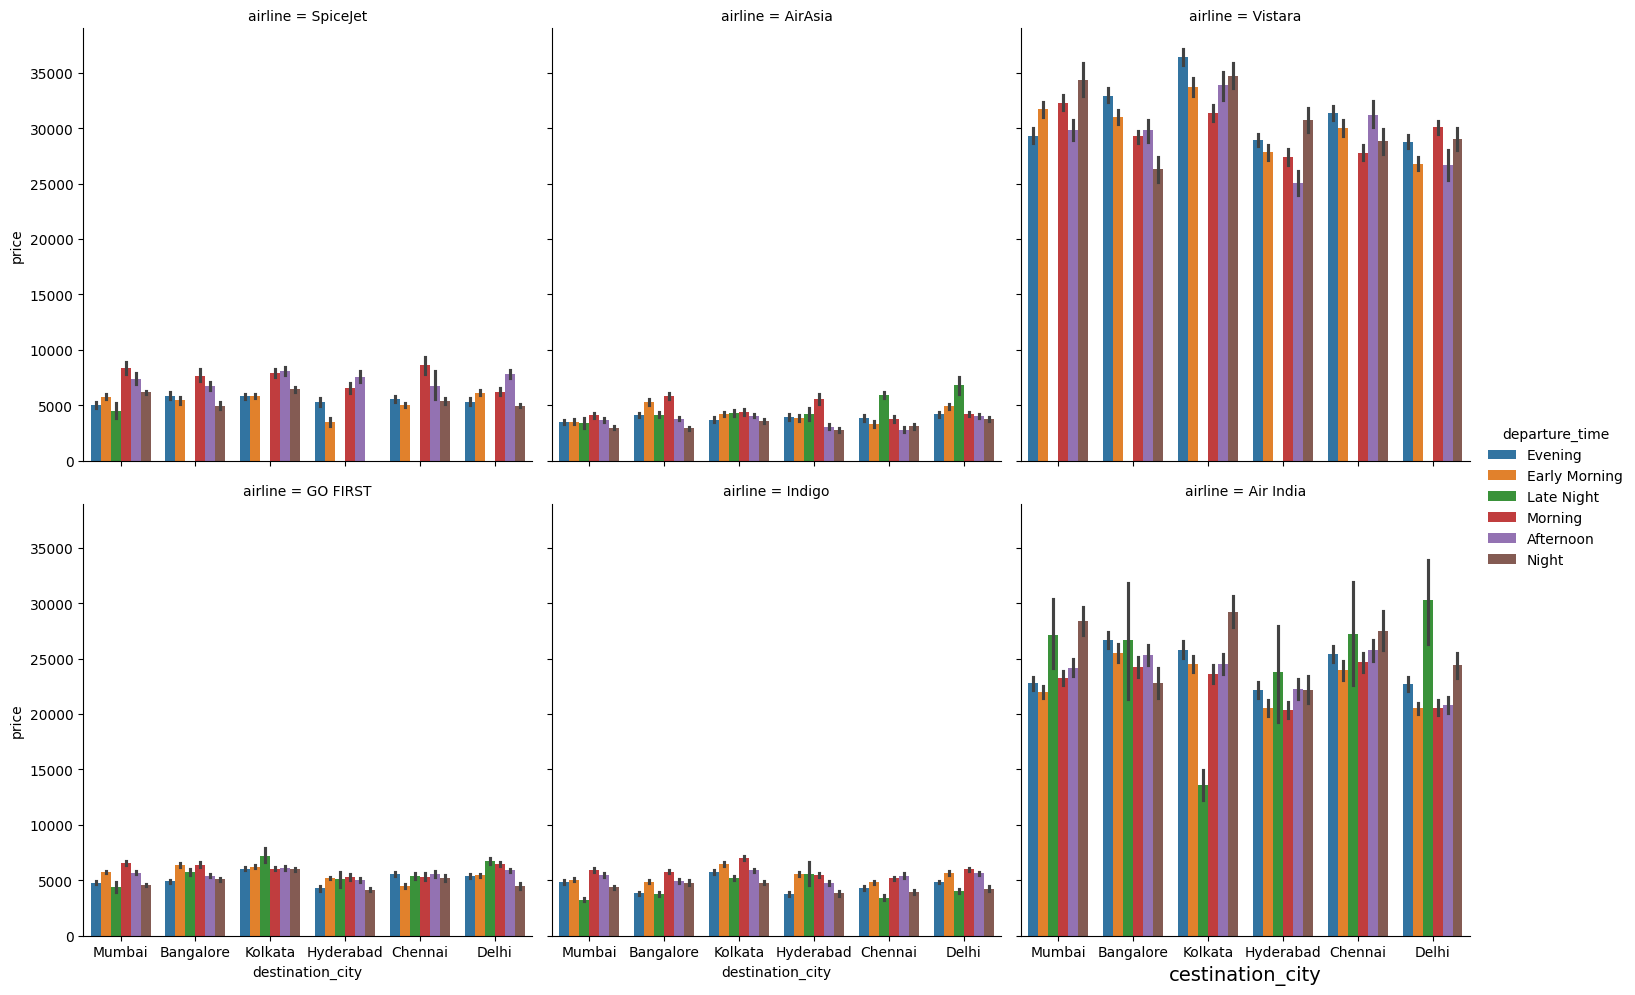

In [ ]:
sns.catplot(x='destination_city',y='price',data=df,hue='departure_time',kind='bar',col='airline',col_wrap=3)
plt.xlabel('cestination_city',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.show()

Average Prices Between Cities by Airlines

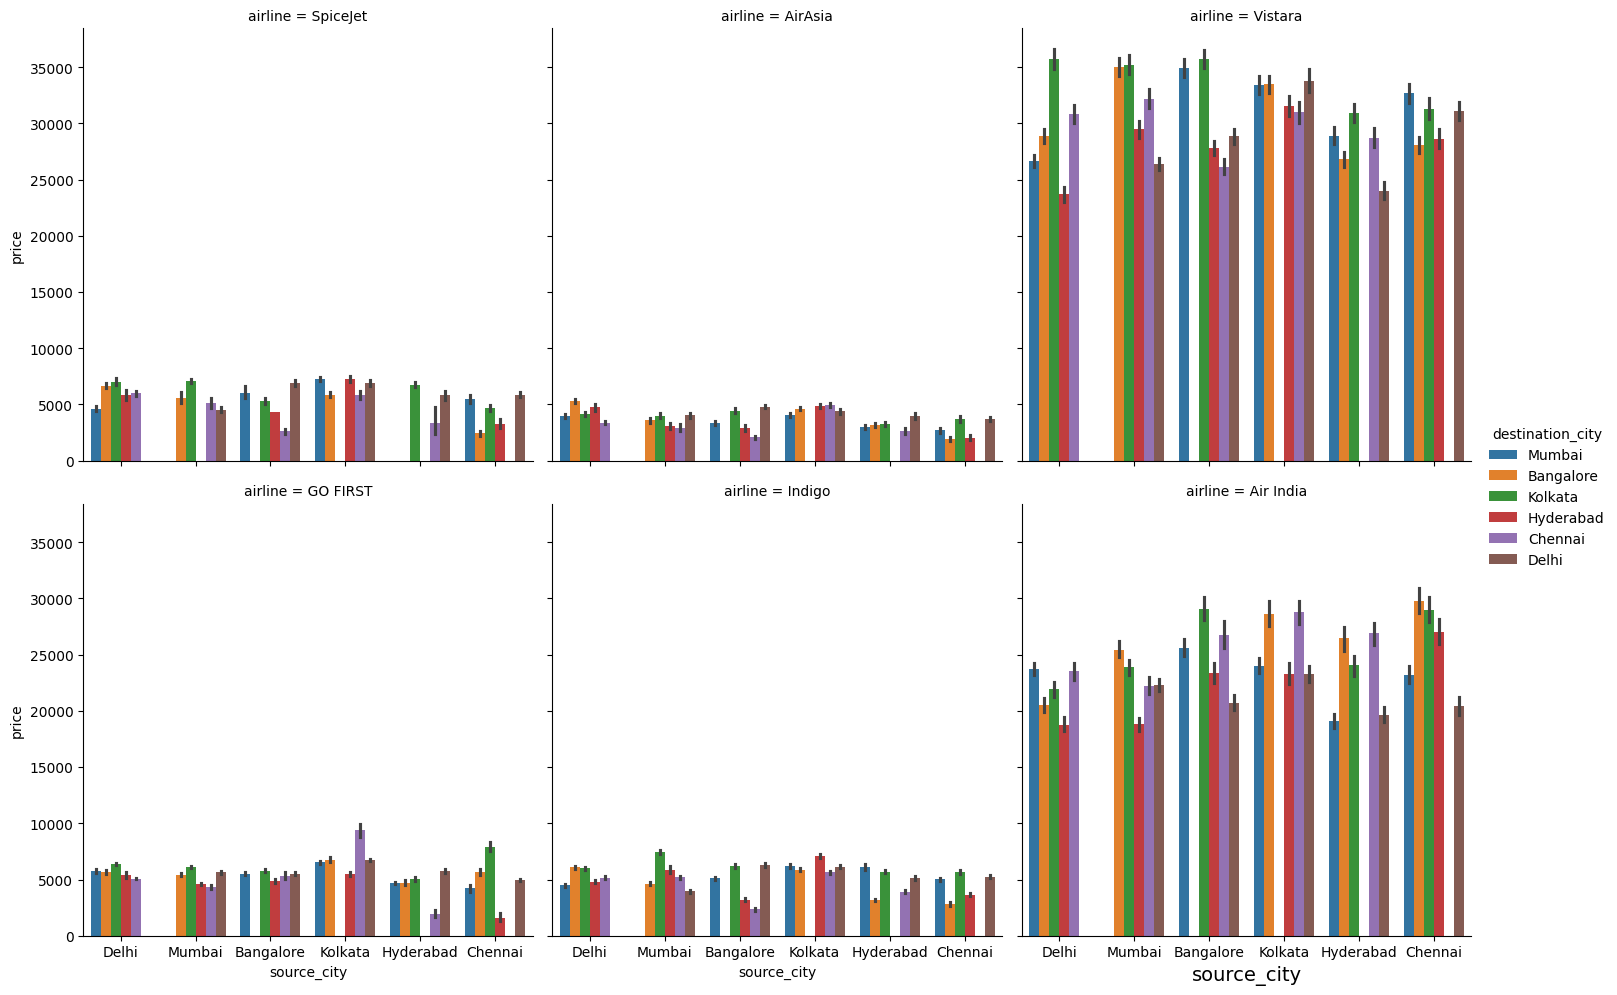

In [ ]:
flight_cities_avg=df.pivot_table(index='source_city',columns='destination_city',aggfunc='mean',values='price')
df_cities_flight_price=pd.DataFrame(flight_cities_avg)
sns.catplot(x=df['source_city'],y=df['price'],data=df_cities_flight_price,hue=df['destination_city'],kind='bar',col=df['airline'],col_wrap=3)
plt.xlabel('source_city',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.show()

Checking The Correlation

price        1.000000
duration     0.204227
days_left   -0.090497
Name: price, dtype: float64


<Axes: >

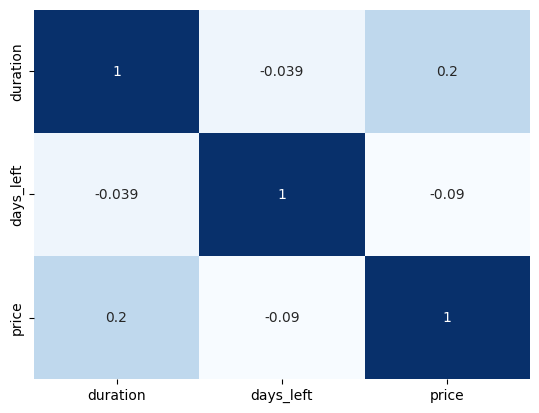

In [ ]:
price_corr=df.corr(numeric_only=True)['price'].sort_values(ascending=False)
print(price_corr)
sns.heatmap(df.corr(numeric_only=True),annot=True,cbar=False,cmap='Blues')

# **Data Preprocessing**

Detecting Outliers

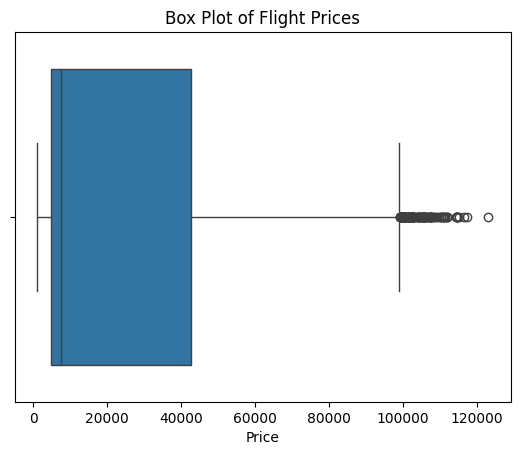

In [11]:
sns.boxplot(x=df['price'])
plt.title('Box Plot of Flight Prices')
plt.xlabel('Price')
plt.show()

Removing Outliers

In [12]:
df = df[(0 < df.price) & (df.price <= 200000)]

Identifying Features

In [13]:
inputs_cols=['airline',  'source_city', 'departure_time','stops', 'arrival_time',
            'destination_city', 'class', 'duration','days_left']
targets_col='price'
inputs_dataset = df[inputs_cols].copy()
targets_set    = df[targets_col].copy()
numeric_cols = inputs_dataset.select_dtypes(include=np.number).columns.tolist()
categorical_cols = inputs_dataset.select_dtypes(include='object').columns.tolist()

Defining Pipeline for Preprocessing

In [14]:
# Preprocessing for numerical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the main pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(RandomForestRegressor())),
    ('regressor', LinearRegression())
])

# Modeling Data

Splitting Data

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(inputs_dataset,targets_set,test_size=0.3,random_state=42)

Defining the Pipeline for Model Training

In [16]:
param_grid = [
    {
        'feature_selection__estimator': [RandomForestRegressor()],
        'feature_selection__estimator__n_estimators': [100, 200],
        'feature_selection__estimator__max_depth': [3, 5, 7]
    },
    {'regressor': [LinearRegression()]},
    {'regressor': [DecisionTreeRegressor()], 'regressor__max_depth': [3, 5, 7]},
    {'regressor': [RandomForestRegressor()], 'regressor__n_estimators': [100, 200], 'regressor__max_depth': [3, 5, 7]},
    {'regressor': [KNeighborsRegressor()], 'regressor__n_neighbors': [3, 5, 7]},
]

In [18]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error') # cv=3 for 3-fold cross-validation
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['duration',
                                                                          'days_left']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['airline',
                                                                          'source_city',
                                                                          'departure_time',
                                                                          'stops',
                                                                          'arrival_time',
                                                                          'destination_city',...
                          'feature_selection__estimator__n_estimators': [100,
                                                                         200]},
                         {'regressor': [LinearRegression()]},
                         {'regressor': [DecisionTreeRegressor()],
                          'regressor__max_depth': [3, 5, 7]},
                         {'regressor': [RandomForestRegressor()],
                          'regressor__max_depth': [3, 5, 7],
                          'regressor__n_estimators': [100, 200]},
                         {'regressor': [KNeighborsRegressor()],
                          'regressor__n_neighbors': [3, 5, 7]}],
             scoring='neg_mean_squared_error')

Evaluating the Best Model

In [19]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(xtest)

mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f"Best Model: {best_model}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'days_left']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source_city',
                                                   'departure_time', 'stops',
                                                   'arrival_time',
                                                   'destination_city',
                

Saving the Best Model

In [20]:
joblib.dump(best_model, 'best_flight_price_model.joblib')

['best_flight_price_model.joblib']

Example Usage by Making a New Prediction

In [23]:
# Load the saved model (which contains the pipelines)
loaded_model = joblib.load('best_flight_price_model.joblib')

# Prepare the new data (similar to before)
new_data = pd.DataFrame({
    'airline': ['Air India'],
    'class': ['Economy'],
    'source_city': ['Delhi'],
    'destination_city': ['Bangalore'],
    'departure_time': ['Morning'],
    'stops': ['one'],
    'arrival_time': ['Evening'],
    'duration': [10.5],
    'days_left': [20]
})

# Make the prediction using the loaded model (which contains the pipelines)
predicted_price = loaded_model.predict(new_data)
print("Predicted Price:", predicted_price[0])

Predicted Price: 6884.760518769243
